In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\winequalityN - winequalityN.csv")

In [4]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
df.duplicated().any()

True

In [9]:
df.duplicated().sum()

1168

In [10]:
df.shape

(6497, 13)

In [11]:
df=df.dropna()

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(5295, 13)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [17]:
X=df.drop(columns=['type'])

In [18]:
y=df['type']

In [19]:
X.shape

(5295, 12)

In [20]:
y.shape

(5295,)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape

(4236, 12)

In [23]:
X_test.shape

(1059, 12)

In [24]:
sc=StandardScaler()

In [41]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [42]:
knn=KNeighborsClassifier(n_neighbors=5)

In [43]:
model=knn.fit(X_train,y_train)

In [44]:
y_pred=model.predict(X_test)

In [45]:
a=accuracy_score(y_test,y_pred)

In [46]:
a

0.9291784702549575

In [48]:
X_train_sc.shape

(4236, 12)

In [49]:
model_sc=knn.fit(X_train_sc,y_train)

In [50]:
y_pred_sc=model_sc.predict(X_test_sc)

In [51]:
a2=accuracy_score(y_test,y_pred_sc)

In [52]:
a2

0.9933899905571294

In [53]:
pca=PCA(n_components=5)

In [54]:
X_train_pca=pca.fit_transform(X_train_sc)
X_test_pca=pca.fit_transform(X_test_sc)

In [55]:
Knn=KNeighborsClassifier(n_neighbors=5)

In [57]:
Knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [59]:
ypred_pca=Knn.predict(X_test_pca)

In [60]:
a3=accuracy_score(y_test,ypred_pca)

In [61]:
a3

0.9603399433427762

In [62]:
pred=pd.DataFrame({'Data':['normal','scaled','pca'],'Accuracy':[a,a2,a3]})

In [63]:
pred

,Data,Accuracy
0,normal,0.929178
1,scaled,0.993390
2,pca,0.960340


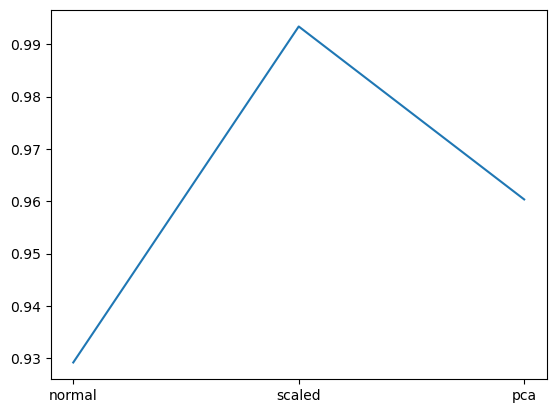

In [64]:
plt.plot(pred['Data'],pred['Accuracy'])